 ## Modeling Building

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

sal_data = pd.read_csv('/Users/jay/Desktop/Spring 2023/ML/My projects/glassdoorData_cleaned.csv')
sal_data.columns
# sal_data.shape

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'studio',
       'studio_yn', 'spark_yn', 'sql_yn', 'aws_yn', 'azure_yn', 'excel_yn',
       'ml_yn', 'scikit_yn', 'job_simplified', 'seniority', 'job_desc_len',
       'num_competitors'],
      dtype='object')

In [4]:
#choosing the relevent columns

sal_model = sal_data[['avg_salary','Rating','Size','Type of ownership','Industry','Sector', 'Revenue',
                     'hourly', 'employer_provided', 'min_salary', 'max_salary','state','age', 'same_state',
                      'age','job_simplified', 'seniority', 'job_desc_len',
       'num_competitors','python_yn','spark_yn', 'sql_yn','excel_yn']]
sal_model.shape

(742, 23)

In [5]:
#get dummy data
sal_dummy = pd.get_dummies(sal_model)
sal_dummy

,avg_salary,Rating,hourly,employer_provided,min_salary,max_salary,age,same_state,age,job_desc_len,...,job_simplified_data engineer,job_simplified_data scientist,job_simplified_director,job_simplified_manager,job_simplified_mle,job_simplified_na,job_simplified_research scientist,seniority_junior,seniority_na,seniority_senior
0,72.0,3.8,0,0,53,91,50,0,50,2536,...,0,1,0,0,0,0,0,0,1,0
1,87.5,3.4,0,0,63,112,39,0,39,4783,...,0,1,0,0,0,0,0,0,1,0
2,85.0,4.8,0,0,80,90,13,0,13,3461,...,0,1,0,0,0,0,0,0,1,0
3,76.5,3.8,0,0,56,97,58,0,58,3883,...,0,1,0,0,0,0,0,0,1,0
4,114.5,2.9,0,0,86,143,25,0,25,2728,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,0,0,58,111,193,0,193,6162,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,0,0,72,133,17,0,17,6130,...,1,0,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,56,91,39,0,39,3078,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,95,160,-1,0,-1,1642,...,0,0,0,1,0,0,0,0,1,0


In [6]:
#train test split
from sklearn.model_selection import train_test_split
X = sal_dummy.drop('avg_salary',axis=1)
y = sal_dummy['avg_salary'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
# Multiple Linear regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.222e+04
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:47:16   Log-Likelihood:                -803.99
No. Observations:                 742   AIC:                             1898.
Df Residuals:                     597   BIC:                             2566.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.2757      0.243     -1.133      0.258      -0.754       0.202
Rating                                                0.0308      0.067      0.462      0.644      -0.100       0.162
hourly                                              -24.3608      0.324    -75.212      0.000     -24.997     -23.725
employer_provided                                    -0.1092      0.437     -0.250      0.803      -0.968       0.749
min_salary                                            0.5041      0.004    113.684      0.000       0.495       0.513
max_salary                                            0.4957      0.003    164.919      0.000       0.490       0.502
age                                                   0.0003      0.001      0.489      0.625      -0.001       0.001
same_state                                         -2.35e-12   1.58e-13    -14.910      0.000   -2.66e-12   -2.04e-12
age                                                   0.0003      0.001      0.489      0.625      -0.001       0.001
job_desc_len                                        6.14e-05   2.57e-05      2.391      0.017     1.1e-05       0.000
num_competitors                                      -0.0276      0.030     -0.920      0.358      -0.086       0.031
python_yn                                             0.1308      0.089      1.465      0.143      -0.045       0.306
spark_yn                                              0.0051      0.099      0.052      0.959      -0.189       0.199
sql_yn                                               -0.1019      0.089     -1.151      0.250      -0.276       0.072
excel_yn                                             -0.0231      0.077     -0.301      0.763      -0.174       0.127
Size_-1                                               0.0318      0.296      0.108      0.914      -0.550       0.614
Size_1 to 50 employees                               -0.2099      0.220     -0.954      0.340      -0.642       0.222
Size_10000+ employees                                 0.5384      0.198      2.715      0.007       0.149       0.928
Size_1001 to 5000 employees                          -0.0193      0.134     -0.145      0.885      -0.282       0.243
Size_201 to 500 employees                            -0.1425      0.133     -1.073      0.284      -0.403       0.118
Size_5001 to 10000 employees                          0.4733      0.186      2.543      0.011       0.108       0.839
Size_501 to 1000 employees                           -0.4776      0.138     -3.455      0.001      -0.749      -0.206
Size_51 to 200 employees                             -0.3389      0.148     -2.286      0.023      -0.630      -0.048
Size_Unknown   

In [8]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train,y_train)

(cross_val_score(lm,X_train,y_train,scoring = 'neg_mean_absolute_error',cv=3))

array([  -6530.70773595, -987098.51210975, -991771.69072066])

In [18]:
# Lasso Regression


lml = Lasso(alpha=0.04)
lml.fit(X_train,y_train)

np.mean(cross_val_score(lml,X_train,y_train,scoring = 'neg_mean_absolute_error',cv=3))


-0.215968279945005

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = c

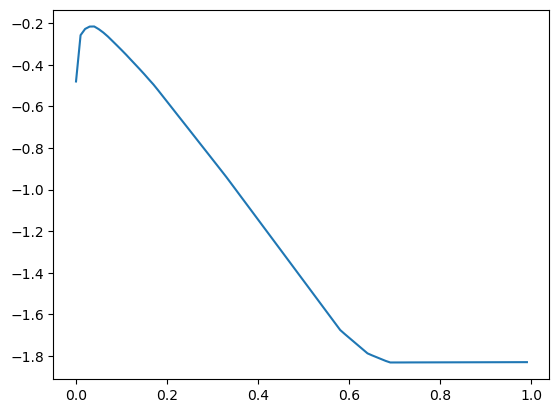

In [19]:
# more analysis using Lasso regression

alpha = []
error = []

for i in range(0,100):
    alpha.append(i/100)
    lm_l = Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(lm_l,X_train,y_train,scoring = 'neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)
    

In [11]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','error'])
# df_err[df_err['error']== max(df_err['error'])]
df_err[df_err['error'] == max(df_err.error)]

,alpha,error
4,0.04,-0.215968


In [12]:
# RandomForestModel

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error',cv=3))

-1.183395716898255

In [13]:
# tune model using GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring = 'neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)


/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-pack

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-pack

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-pack

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-pack

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-pack

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-pack

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/jay/opt/anaconda3/lib/python3.9/site-pack

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [14]:
gs.best_score_

-1.136563674269893

In [15]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=280)

In [21]:
#test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lml.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error

mae_lm = mean_absolute_error(y_test,tpred_lm)
mae_lml = mean_absolute_error(y_test,tpred_lml)
mae_rf = mean_absolute_error(y_test,tpred_rf)
print(mae_lm,'MAE of Linear Model')
print(mae_lml,'MAE of Lasso Model')
print(mae_lml,'MAE of RandomForest Model')

277509.56727060827 MAE of Linear Model
0.29785037452496105 MAE of Lasso Model
0.29785037452496105 MAE of RandomForest Model
